#**¿Regresión logística, bosque aleatorio o KNN?**
###**Tarea**
Utilizando el wine cultivars dataset de la sección de clasificación multiclase, tu tarea es utilizar modelos de regresión logística (uno frente a uno y uno frente a todos) y ajustarlos para su rendimiento óptimo. También debes intentar comparar el efecto de cuando intentas utilizar la regularización l1 y l2. Esta es una gran oportunidad para ver qué sucede cuando intentas ajustar un modelo. Después de hacer eso, intenta usar los modelos KNN, Bagged tree y Random Forest.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier



Mounted at /content/drive


In [3]:
col_names = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']

In [4]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None,names = col_names)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Las clases no están equilibradas
df['Class label'].value_counts(dropna = False)

2    71
1    59
3    48
Name: Class label, dtype: int64

In [7]:
# Organizar los datos en la matriz de características y el vector de destino
X = df.loc[:, df.columns[(df.columns != 'Class label')]]
y = df.loc[:, 'Class label'].values

In [6]:
# Dividir en conjuntos de prueba y entrenamiento
# Proporcionar la matriz de etiquetas de clase y como argumento para estratificar asegura a ambos
# el conjunto de entrenamiento y los conjuntos de datos de prueba tienen las mismas proporciones de clase que el
# conjunto de datos original
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [ ]:
#Cantidad de observaciones por clase en el conjunto de datos train
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 41, 2: 50, 3: 33}

In [8]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##**Regresión logistica: OVR-l1**

In [ ]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


##**Regresión logistica: OVO-l1**

In [ ]:
log_reg = OneVsOneClassifier(LogisticRegression(penalty='l1', C=1.0,solver='liblinear')).fit(X_train, y_train)

print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


##**Regresión logistica: OVR-l2**

In [ ]:
log_reg = LogisticRegression(penalty='l2',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


##**Regresión logistica: OVO-l2**

In [ ]:
log_reg = OneVsOneClassifier(LogisticRegression(penalty='l2', C=1.0,solver='liblinear')).fit(X_train, y_train)

print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


##**KNN clasificación**

In [ ]:
#importar el modelo de datos
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#crear instancia del modelo
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
#entrenar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#Score
knn.score(X_train, y_train)

0.9596774193548387

##**Decision tree**

In [11]:
#Paso 1: Importa el modelo que quieres usar
from sklearn.tree import DecisionTreeClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [12]:
#Paso 2: Crear una instancia del modelo
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)



In [13]:
#Paso 3: Entrenar el modelo en los datos, almacenando la información aprendida.
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [14]:
#Paso 4: Predecir las etiquetas de nuevos datos (nuevas flores)
# Predecir para una observación
clf.predict(X_test.iloc[0].values.reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [15]:
clf.predict(X_test[0:10])

array([1, 1, 1, 2, 3, 2, 1, 1, 2, 2])

In [16]:
# calcular la precisión de clasificación
score = clf.score(X_test, y_test)
score

0.8

##**Random Forest**

In [18]:
#Paso 1: Importa el modelo que quieres usar
from sklearn.ensemble import RandomForestClassifier

In [19]:
#Paso 2: Crear una instancia del modelo
clf = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [20]:
#Paso 3: Entrenar el modelo en los datos, almacenando la información aprendida.
clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [21]:
#Step 4: Predice las etiquetas de los datos nuevos
clf.predict(X_test.iloc[0].values.reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [22]:
pd.DataFrame(y_train)[0].value_counts(dropna = False)

2    53
1    41
3    39
Name: 0, dtype: int64

In [23]:
# calcular la precisión de clasificación para el modelo que se entrenó
score = clf.score(X_test, y_test)
score

0.9777777777777777

In [24]:
#Error de generalizacion
clf.oob_score_

0.9849624060150376

In [25]:
#afinacion del numero de arboles de decision
estimator_range = [1] + list(range(10, 310, 10))

In [26]:
estimator_range

[1,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300]

In [27]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
# Use la división entrenamiento prueba con cada valor de n_estimators (Advertencia: ¡Lento!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

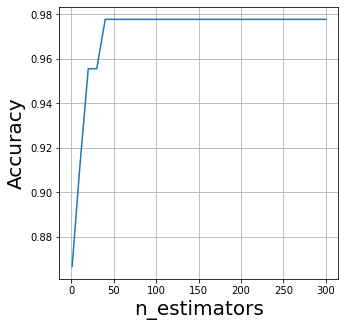

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

Se ve que el rendimiento de la precisión del modelo no se ve afectado en ningun punto. Esto puede preocupar porque tal vez el modelo está sobreajustado.